In [29]:
import pandas as pd
from collections import Counter
from __future__ import division
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plt_time
from datetime import datetime, timedelta
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

p = sns.color_palette()

In [2]:
data_data = pd.read_csv('data.csv', header=None)

In [3]:
data_newsignup = pd.read_csv('newSignUp.csv', header=None)

In [4]:
# Renaming the columns of the dataframes
data_data.columns = ['timeOfInvite', 'userId']
# data_data['timeOfInvite'] = data_data['timeOfInvite']/1000
data_data.head()

,timeOfInvite,userId
0,1480510108336,e520a6a5abeff22149ca9ccf9070cd43
1,1480510107994,2c2612300f4cb1e596452d98a4384a20
2,1480510112350,b6811a75d115329d76b33cab3acbda21
3,1480510109700,e7dcc2c312417b23d45a71ed331cf09d
4,1480510108558,86ea3eda601883a75f43318d29792aa0


In [5]:
data_newsignup.columns = ['userId', 'timeOfSignUp', 'ifInvited']
data_newsignup.tail()

,userId,timeOfSignUp,ifInvited
776814,69e1d4ab4c3b9443e036d90d2d10c9bc,1482604047,0
776815,c9991b393179a3f56fa3f239ec243f9e,1482603683,0
776816,a7fc12578d3c2d4fb2b8ee1a78f839b8,1482603709,1
776817,28f3315671d0b7e860ac5cc54c3d69dd,1482603967,0
776818,b823f85b713229fcf34bc59d9365786b,1482603852,0


#### What is the data that we have ?

In [6]:
print len(set(data_data.iloc[:,1]) & set(data_newsignup.iloc[:,0]))
print min(len(data_data), len(data_newsignup))

386755
776819


Counter({0: 645355, 1: 131464})

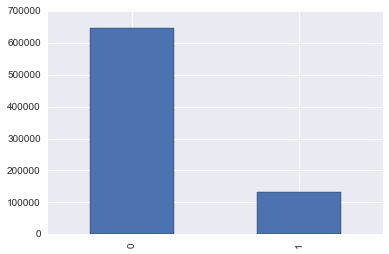

In [7]:
data_newsignup.ifInvited.value_counts().plot(kind='bar')
Counter(data_newsignup.ifInvited)


In [8]:
# Unique values in dataset
print len(list(data_newsignup.userId))
print len(set(data_newsignup.userId))

# There are no duplicate users in the data set data_newsignup

776819
776819


In [9]:
# Unique values in dataset
print len(list(data_data.userId))
print len(set(data_data.userId))

# There are obviously duplicate users in this dataset. One user may have sent multiple invites.
# From this data we can extract the average number of invites sent by a user
# Also by merging the two datasets,we can calculte the time taken between the signup and sending the invite for certain users
# Since we want to know the no of invitaions sent within 20 days of signup this exercise needs to be done

12700394
868546


In [34]:
temp_df = pd.merge(data_newsignup,data_data,how='inner',on=['userId'])

In [35]:
temp_df = temp_df[['userId','timeOfSignUp','timeOfInvite','ifInvited']]
temp_df['TimeTakenForInvite'] = temp_df['timeOfInvite'] - temp_df['timeOfSignUp']*1000
temp_df['NoOfDays'] = [round(item/(1000*60*60*24)) for item in temp_df['TimeTakenForInvite']]
temp_df.head()

,userId,timeOfSignUp,timeOfInvite,ifInvited,TimeTakenForInvite,NoOfDays
0,2196b3343292abd76c6429161ff1817a,1480271670,1480609027125,0,337357125,4.0
1,2196b3343292abd76c6429161ff1817a,1480271670,1480609056552,0,337386552,4.0
2,2196b3343292abd76c6429161ff1817a,1480271670,1480609156510,0,337486510,4.0
3,2196b3343292abd76c6429161ff1817a,1480271670,1480609225741,0,337555741,4.0
4,2196b3343292abd76c6429161ff1817a,1480271670,1480609248397,0,337578397,4.0


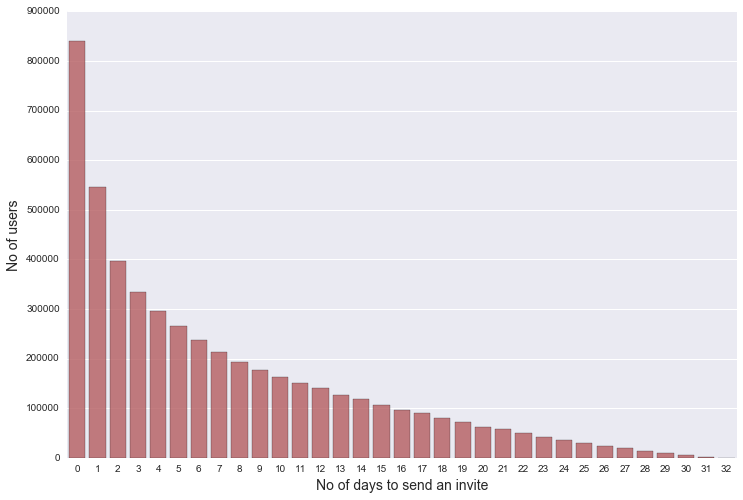

In [12]:
# ASSUMPTION: We'll treat different invitations sent by a user as different observations
# Visualizing the distribution of the number of days within which a user sends an invite
temp_df.NoOfDays = temp_df.NoOfDays.astype(int)
days = temp_df.NoOfDays.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(days.index, days.values, alpha=0.8, color=p[2])
plt.xlabel('No of days to send an invite', fontsize=14)
plt.ylabel('No of users', fontsize=14)

del days

### Average number of invites sent by a user within 20 days of signing up

count    383400.000000
mean         12.273938
std          27.319984
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max        3830.000000
Name: NoOfDays, dtype: float64


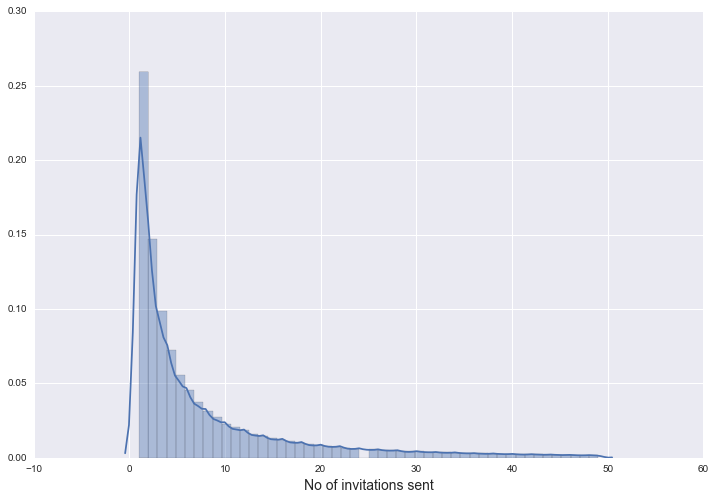

In [43]:
temp_df2 = temp_df[temp_df.NoOfDays <= 20]
share_stats = temp_df2.groupby('userId')['NoOfDays'].count()
# share_stats
plt.figure(figsize=(12,8))
sns.distplot(share_stats[share_stats < 50])
plt.xlabel('No of invitations sent', fontsize=14)

print share_stats.describe()

In [38]:
# These three users stand out with more than 1000 shares
share_stats[share_stats>1000]

userId
090a00d12b93c33858fc261f52a1ed70    3830
3f902c1286f29ebfe25e2face8d0217e    1163
de4658178c35fe3e0718429d40e97f0e    1031
Name: NoOfDays, dtype: int64

### Average number of new people who join Q by a user’s invitation in his/her first 20 days

In [61]:
# Subset the dataframe temp_df such that now there are only those users who have sent an invite within 20 days of their signup
# Create a new dataframe from this containing unique users with the average of time of invites sent by him

temp2 = temp_df[temp_df.NoOfDays <= 20].groupby('userId')['timeOfInvite'].mean()
temp2 = pd.DataFrame({'userId':temp2.index, 'MeanInviteTime':temp2.values})
temp2 = temp2[['userId', 'MeanInviteTime']]

In [62]:
temp2.head()

,userId,MeanInviteTime
0,00002eb25d60a09c318efbd0797bffb5,1481213139425
1,0000584b8cdaeaa6b3de82be509db839,1480609534867
2,0000a9af8b6b9cc9e41f53322a8b8cf1,1481704191662
3,0000c20705a45563f2ec6a53088c2a30,1481805745610
4,0000d299ce46c8375f29f7bb792b9eae,1481874579655


In [77]:
# Function to get total number of possible signups using the link shared by a user 

def get_average_signups(row):
    mean_time = row['MeanInviteTime'] / 1000            # converting milliseconds to seconds
    max_time = mean_time + 4*24*60*60                   # The time till which the invite will be valid
    probable_signups = data_newsignup_invited[(data_newsignup_invited.timeOfSignUp >= mean_time) & (data_newsignup_invited.timeOfSignUp <= max_time)]
#     data_newsignup_invited.ix[probable_signups.index, 'flag'] = 1
    return probable_signups.shape[0] 
    
#     return data_newsignup.shape[0]

In [65]:
temp2["TotalNumberOfSignUps"] = temp2.apply(lambda row: get_average_signups(row),axis=1)

In [120]:
tot_signups_approach1 = temp2.TotalNumberOfSignUps

In [137]:
# get_average_signups()
# data_newsignup['flag'] = 0
# data_newsignup.head()
data_newsignup_invited = data_newsignup[data_newsignup.ifInvited==1]
data_newsignup_invited['flag'] = 0
data_newsignup_invited = data_newsignup_invited[['userId', 'timeOfSignUp', 'flag']]

C:\Users\a566280\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [67]:
temp2['TotalNumberOfSignUps'].describe()

count    383400.000000
mean      16947.336701
std        7234.822284
min           0.000000
25%       17470.750000
50%       19247.000000
75%       21751.000000
max       23007.000000
Name: TotalNumberOfSignUps, dtype: float64

In [70]:
print sum(temp2['TotalNumberOfSignUps'])
print data_newsignup.shape[0]

6497608891
776819


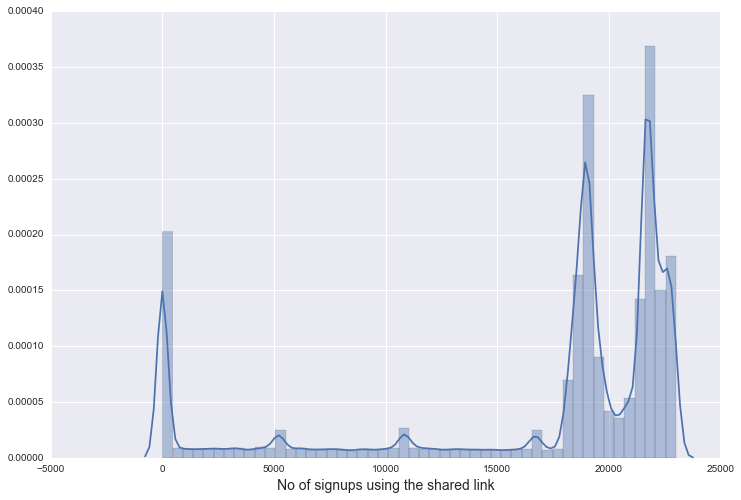

In [73]:
# Visualizing the distribution of the number of days within which a user sends an invite
# temp2.TotalNumberOfSignUps = temp_df.NoOfDays.astype(int)
total_su = temp2.TotalNumberOfSignUps.value_counts()

plt.figure(figsize=(12,8))
# sns.barplot(total_su.index, total_su.values, alpha=0.8, color=p[2])
sns.distplot(temp2.TotalNumberOfSignUps)
plt.xlabel('No of signups using the shared link', fontsize=14)
# plt.ylabel('No of users', fontsize=14)

del total_su

In [124]:
# Similar function as the previous one just that this time there won't be overlapping of the observations

def get_average_signups_new(row):
    mean_time = row['MeanInviteTime'] / 1000            # converting milliseconds to seconds
    max_time = mean_time + 4*24*60*60                   # The time till which the invite will be valid
    probable_signups = data_newsignup_invited[(data_newsignup_invited.timeOfSignUp >= mean_time) & (data_newsignup_invited.timeOfSignUp <= max_time) & (data_newsignup_invited.flag==0)]
    data_newsignup_invited.ix[probable_signups.index, 'flag'] = 1
    return probable_signups.shape[0] 

In [143]:
temp2["TotalNumberOfSignUps"] = temp2.apply(lambda row: get_average_signups_new(row),axis=1)

In [147]:
temp2['TotalNumberOfSignUps'].describe()

count    383400.000000
mean          0.331022
std          69.653056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       21644.000000
Name: TotalNumberOfSignUps, dtype: float64

In [156]:
temp2[temp2.TotalNumberOfSignUps == 0 ].shape[0]
# Using the newer approach there are these many people with no signups using the link they shared

383384

In [161]:
temp2[temp2.TotalNumberOfSignUps > 0].TotalNumberOfSignUps.describe()

count       16.000000
mean      7932.125000
std       7542.868666
min         36.000000
25%       1937.000000
50%       4691.000000
75%      13026.750000
max      21644.000000
Name: TotalNumberOfSignUps, dtype: float64

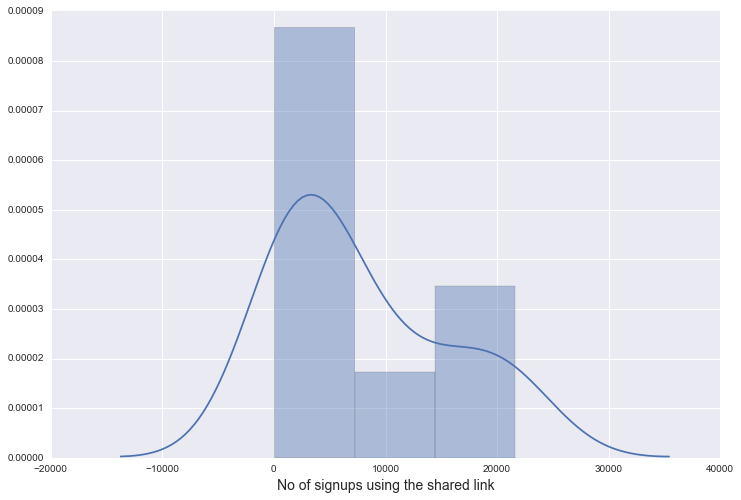

In [154]:
# Visualizing the distribution of the number of days within which a user sends an invite
# temp2.TotalNumberOfSignUps = temp_df.NoOfDays.astype(int)
total_su = temp2.TotalNumberOfSignUps.value_counts()

plt.figure(figsize=(12,8))
sns.distplot(temp2[temp2.TotalNumberOfSignUps>0].TotalNumberOfSignUps)
plt.xlabel('No of signups using the shared link', fontsize=14)

del total_su

### Using the given data try to predict/extrapolate how number of user signups will grow in next 2 months.

In [6]:
# For this we'll use the data given for new signups
# First we'll see that how far are the time/date of signups spread ?

print (max(data_newsignup.timeOfSignUp) - min(data_newsignup.timeOfSignUp)) / (60*60*24)

26.9993981481


In [7]:
temp_df3 = data_newsignup[['timeOfSignUp']]

In [9]:
# Since we need a date time object in order to fit TS models, populating the data with dates incorporating the time of signup
temp_df3['date'] = [datetime.strptime('05/01/1969', '%m/%d/%Y').date() + timedelta(seconds=float(item)) for item in temp_df3['timeOfSignUp']]

C:\Users\a566280\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
# temp_df3.head()
time_series_data = pd.DataFrame()
temp = temp_df3.groupby('date')['timeOfSignUp'].count()

In [24]:
time_series_data['date'] = temp.index
time_series_data['NoOfUsers'] = temp.values
del temp

time_series_data.index = time_series_data.date

time_series_data.drop(['date'],axis=1,inplace=True)
del time_series_data.index.name

time_series_data.index = pd.to_datetime(time_series_data.index)

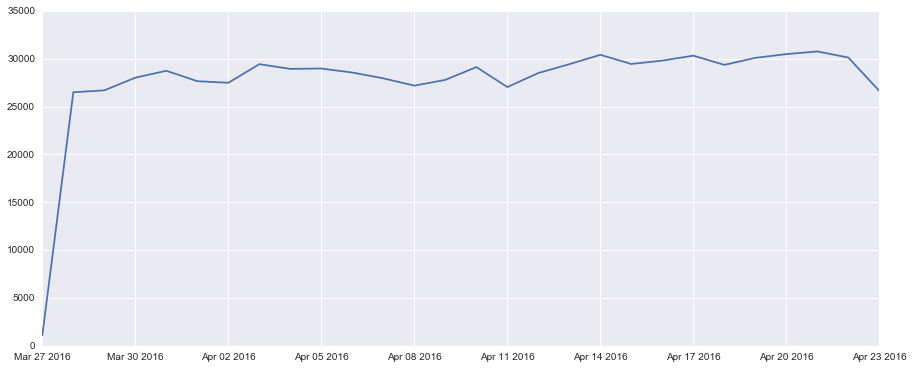

In [30]:
plt_time.plot(time_series_data)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [ ]:
test_stationarity(time_series_data)

#### If the time series is not satationary, we make it stationary through transformations

In [ ]:
There are many built in methods in python to estimate trend
We can use a moving average for this purpose or a weighted moving average for that purpose
After estimating trend subtract this from the original time series

We can simply decompose the time series and get the trend and the seasonality component.
When we subtract these values from the original time series we get a stationar time series
Then we can easily model the residuals after checking their stationarity



I am not going forward with the implementation of this part as most of it has been described in theory above and is not
very difficult once the data has been created. It'll also take some time to create the outputs. If you want me to go ahead and do the forecaseting I've no problem in doing so.

In [ ]:
pd.read_sas('')